# Lab 3
## Sudhan Shrestha - 8889436

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error,r2_score, classification_report, confusion_matrix

In [277]:
df_credit = pd.read_csv("csv/creditcard.csv")
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [278]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [279]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [280]:
features = df_credit.columns
print("Features of our datset: \n", features)

Features of our datset: 
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [281]:
print("Null values: ", df_credit.isnull().sum().max())

Null values:  0


In [282]:
# performing feature scaling on the "Amount" column of the DataFrame.
scaler = StandardScaler()
df_credit["Amount"] = scaler.fit_transform(df_credit["Amount"].values.reshape(-1, 1))
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [283]:
#dropping Time
df_credit.drop('Time', axis=1, inplace= True)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Droping time as it seems irrelivant for prediction.

In [284]:
# checking the number of fraud and non fraud transactions in the DataFrame.
non_fraud = len(df_credit[df_credit.Class == 0])
fraud = len(df_credit[df_credit.Class ==1])
fraud_pecentage = (fraud/ (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_pecentage))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


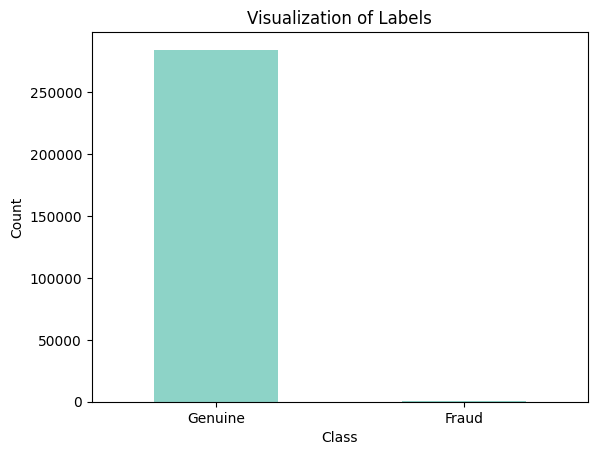

In [285]:
labels = ["Genuine", "Fraud"]
class_count = df_credit.value_counts(df_credit['Class'], sort=True)
class_count.plot(kind = "bar", rot = 0, colormap='Set3')
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [286]:
# preparing the data for the model.
X = df_credit.drop(["Class"], axis= 1)
y = df_credit['Class']
# splitting the data into training and testing sets for the model.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [287]:
#  creating an instance of the LogisticRegression model with a maximum number of iterations set to 10000. 
# Then, fitting the model to make predictions.
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [288]:
credit_prediction = model.predict(X_test)
credit_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [289]:
print(f"Accuracy of the model: {accuracy_score(y_test, credit_prediction) * 100:.4f}%")

Accuracy of the model: 99.9263%


Confusion Matrix:


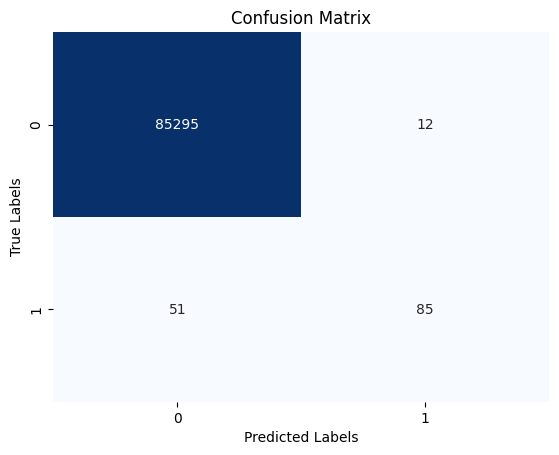

In [290]:
conf_matrix = confusion_matrix(y_test, credit_prediction)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The model shows good overall performance, with a high number of true positives (85) and true negatives (85295). Although there were some misclassifications (12 false positives and 51 false negatives), their impact appears relatively limited.

In [291]:
credit_classficationreport = classification_report(y_test, credit_prediction)
print("Classification Report: \n", credit_classficationreport)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



The classification report indicates that the model has high accuracy (1.00) and performs very well for class 0 with precision of 1.00, recall of 1.00 and f1-score of 1.00. However, for class 1, the model's performance is lower, with precision of 0.88, recall of 0.62 and recall of 0.73. The difference in metrics between class can be due to the high imbalance betweeen class (Genuine and Fraud Transactions).

Overall the model perfoms exceptionally good for the class 0 while it struggles for predictiing correctly for the class 1 dues to imbalance of data.

**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 

In [292]:
df_insurance = pd.read_csv("csv/insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [293]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [294]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [295]:
print("Checking for null values:")
df_insurance.isnull().sum()

Checking for null values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='region', ylabel='charges'>

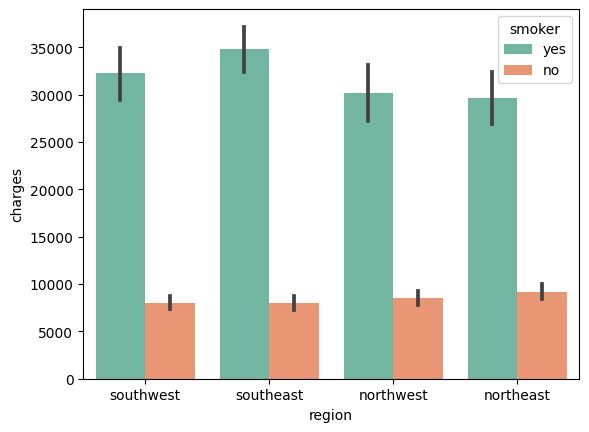

In [296]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df_insurance, palette='Set2')

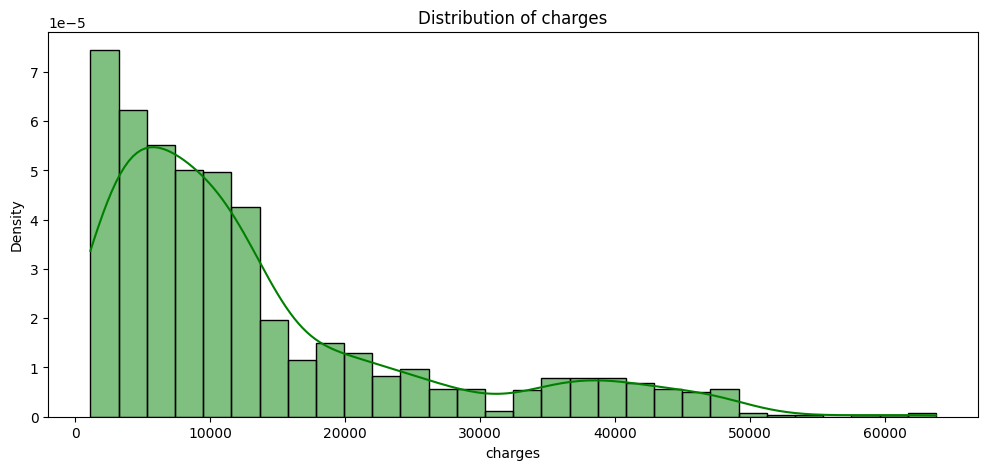

In [297]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax= sns.histplot(df_insurance["charges"], color = 'g', kde=True, stat='density')

In [298]:
#  using the LabelEncoder to convert categorical variables into numerical variables.
encoder= LabelEncoder()
df_insurance['sex']= encoder.fit_transform(df_insurance['sex'])
df_insurance['smoker']= encoder.fit_transform(df_insurance['smoker'])
df_insurance['region']= encoder.fit_transform(df_insurance['region'])
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

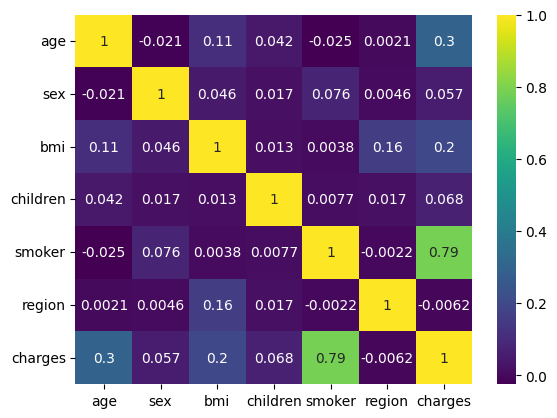

In [299]:
# calculating the correlation matrix of the `df_insurance` DataFrame. 
# Then creating a heatmap for it.
corr = df_insurance.corr()
sns.heatmap(corr, cmap='viridis', annot=True)

There are no major corelation except between smoker and charges.

In [300]:
# creating dummy variables for the categorical columns 'sex', 'smoker', and 'region' in the DataFrame `df_insurance`.
df_insurance = pd.get_dummies(df_insurance, columns=['sex', 'smoker', 'region'])
df_insurance.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [301]:
# preparing the data for the model.
X = df_insurance.drop("charges", axis=1)
y = df_insurance["charges"]

# splitting the data into training and testing sets for the model.
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [302]:
# creating an instance of the LinearRegression model and then fitting the model to the training data. 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [303]:
# making predictions on test data
insurance_prediction = model.predict(X_test)

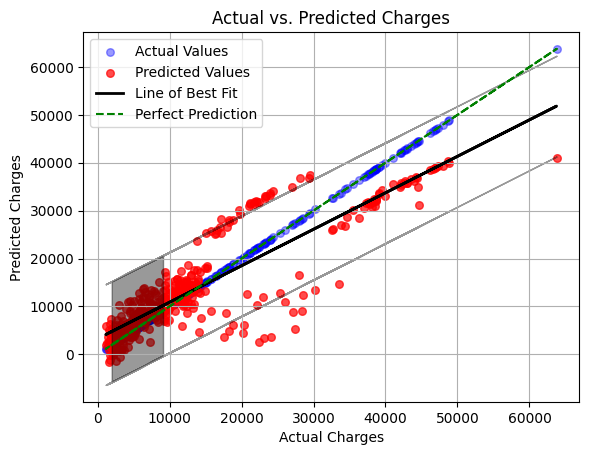

In [304]:
#  calculates the coefficients of the line that best fits the data using the method of least squares. 
fit_line = np.polyfit(y_test, insurance_prediction, 1)

# creating a scatter plot of the actual values.
plt.scatter(y_test, y_test, alpha=0.4, color='blue', s=30, label='Actual Values')


# creating a scatter plot of the predicted values.
plt.scatter(y_test, insurance_prediction, alpha=0.7, color='red', s=30, label='Predicted Values')

# plotting the line of best fit on the scatter plot.
plt.plot(y_test, np.polyval(fit_line, y_test), color='black', linewidth=2, label='Line of Best Fit')

# plotting a line on the scatter plot that represents a perfect prediction.
plt.plot(y_test, y_test, color='green', linestyle='--', label='Perfect Prediction')

# Adding the confidence interval shaded area
# calculates the predicted values of the dependent variable (charges) based on the line of best fit coefficients (`fit_line`) and the independent variable values (`y_test`).
y_fit = np.polyval(fit_line, y_test)
plt.fill_between(y_test, y_fit - np.std(insurance_prediction), y_fit + np.std(insurance_prediction), color='black', alpha=0.4)

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.grid(True)
plt.legend(loc='upper left', frameon=True)
plt.show()



In [305]:
# calculating and printing various evaluation metrics for the model's predictions.
mse = mean_squared_error(y_test, insurance_prediction)
mae = mean_absolute_error(y_test, insurance_prediction)
rmse = np.sqrt(mean_squared_error(y_test, insurance_prediction))
r2 = r2_score(y_test, insurance_prediction)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-ssquared: {r2:.4f}")

Mean Squared Error: 33780509.5748
Root Mean Squared Error: 5812.1003
Mean Absolute Error: 4145.4506
R-ssquared: 0.7696


The R-squared value of 0.7696 indicates that the model predicts about 76.69% of the variance in the target variable. However, the high Root Mean Squared Error and Mean Absolute Error indicates that there are still notable errors in our models predictions. The RMSE of 5812.1003 and MAE of 4145.4506 suggest that, on average, the model's predictions deviate by approximately 5812.1003 and 4145.4506 units, respectively, from the actual values.